
### KNN(K Nearest Neighbours)
- k is no of nearest neighbours
- tries to classify the based on the similarity of the data ponits
- Recommended systems

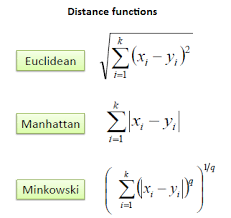


Steps are

- calculate the distance(Euclidean distance)
- find the closest neighbours(choose the value of k)
- vote for labels

In [1]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Classification/shirt.csv")

In [2]:
df.shape

(18, 3)

In [3]:
df["Size"].value_counts()

L    11
M     7
Name: Size, dtype: int64

In [4]:
M=df[df["Size"]=="M"]

In [5]:
L=df[df["Size"]=="L"]
L

,Height,Weight,Size
7,160,64,L
8,163,64,L
9,165,61,L
10,165,61,L
11,165,62,L
12,168,62,L
13,168,63,L
14,168,66,L
15,170,63,L
16,170,64,L


In [6]:
g=df.groupby("Size")
g.get_group("M")

,Height,Weight,Size
0,158,58,M
1,158,59,M
2,158,63,M
3,160,59,M
4,160,60,M
5,163,60,M
6,163,61,M


In [7]:
g.get_group("L")

,Height,Weight,Size
7,160,64,L
8,163,64,L
9,165,61,L
10,165,61,L
11,165,62,L
12,168,62,L
13,168,63,L
14,168,66,L
15,170,63,L
16,170,64,L


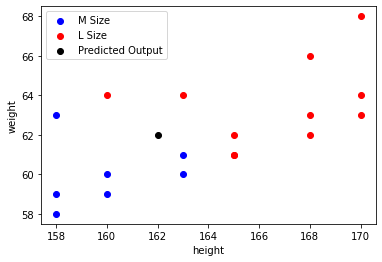

In [8]:
import matplotlib.pyplot as plt
plt.scatter(M["Height"],M["Weight"],c='b',label="M Size")
plt.scatter(L["Height"],L["Weight"],c='r',label="L Size")
plt.scatter(162,62,c='k',label="Predicted Output")
plt.xlabel("height")
plt.ylabel("weight")
plt.legend()
plt.show()

In [9]:
x=df.iloc[:,:2]
x

,Height,Weight
0,158,58
1,158,59
2,158,63
3,160,59
4,160,60
5,163,60
6,163,61
7,160,64
8,163,64
9,165,61


In [12]:
y=df["target"]
from sklearn.preprocessing import LabelEncoder
model=LabelEncoder()
df["target"]=model.fit_transform(df["Size"])

In [13]:
df

,Height,Weight,Size,target
0,158,58,M,1
1,158,59,M,1
2,158,63,M,1
3,160,59,M,1
4,160,60,M,1
5,163,60,M,1
6,163,61,M,1
7,160,64,L,0
8,163,64,L,0
9,165,61,L,0


In [14]:
from sklearn.neighbors import KNeighborsClassifier
nb=KNeighborsClassifier(n_neighbors=3)
nb.fit(x,y)

KNeighborsClassifier(n_neighbors=3)

In [15]:
nb.predict([[162,62]])

array([1])

In [16]:
y_pred=nb.predict(x)

In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score
accuracy_score(y,y_pred)

1.0

In [18]:
confusion_matrix(y,y_pred)

array([[11,  0],
       [ 0,  7]], dtype=int64)

In [19]:
#precision=correct values/total predicted values
#recall=correct values/total actual values
precision_score(y,y_pred)

1.0

In [20]:
recall_score(y,y_pred)

1.0

In [22]:
#heart disease datset
df=pd.read_csv("https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Classification/Heart_disease.csv")

In [23]:
df.isna().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64

In [25]:
x

,Height,Weight
0,158,58
1,158,59
2,158,63
3,160,59
4,160,60
5,163,60
6,163,61
7,160,64
8,163,64
9,165,61


In [28]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=25)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
nb=KNeighborsClassifier(n_neighbors=4)
nb.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)